In [185]:
import os
import xarray as xr
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

import netcdf4

ModuleNotFoundError: No module named 'netcdf4'

In [2]:
models = [
          'ACCESS1-0', 'ACCESS1-3', 'CCSM4', 'CESM1-BGC', 'CESM1-CAM5', 'CMCC-CM', 'CMCC-CMS', 'CSIRO-Mk3-6-0', 
          'CanESM2', 'CNRM-CM5', 'EC-EARTH', 'FGOALS-g2', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-H',
          'GISS-E2-R', 'HadGEM2-AO', 'HadGEM2-CC', 'HadGEM2-ES', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'MIROC-ESM',
          'MIROC-ESM-CHEM', 'MIROC5', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MRI-CGCM3', 'NorESM1-M', 'bcc-csm1-1',
          'bcc-csm1-1-m', 'inmcm4'
         ]

ext = 'nc'

In [3]:
data_dir = 'data'
file_list = glob(os.path.join(data_dir, '*.nc'))
print(file_list)

['data\\tasmax_day_ACCESS1-0_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_ACCESS1-3_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_bcc-csm1-1-m_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_bcc-csm1-1_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_CanESM2_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_CCSM4_rcp85_r6i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_CESM1-BGC_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_CESM1-CAM5_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_CMCC-CMS_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_CMCC-CM_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'data\\tasmax_day_CNRM-CM5_rcp85_r1i1p1_20060101-20061231.LOCA_2016-04-02.16th.CA_NV.nc', 'da

In [77]:
def kelvin_to_f(value):
    return (value - 273.15) * 9 / 5 + 32

In [74]:
def calc_annual_avg():
    averages = []
    for file in file_list:
        ds = xr.open_dataset(file)
        tasmax = ds['tasmax']
        data = tasmax.sel(lat=38.59375, lon=(360-121.46875), method='nearest')
        avg = data.values.mean()
        model = file.split('_')[2]
        averages.append((model, avg))
        ds.close()
    return pd.DataFrame(averages, columns=['model', 'avg'])

In [75]:
annual_df_2006 = calc_annual_avg()

In [194]:
annual_min = annual_df_2006['avg'].min()
annual_max = annual_df_2006['avg'].max()

In [195]:
print('Min for 2006 from annual data', annual_min)
print('Max for 2006 from annual data', annual_max)

Min for 2006 from annual data 296.052490234375
Max for 2006 from annual data 299.5120544433594


In [82]:
def calc_monthly_avg():
    df_list = []
    for file in file_list:
        ds = xr.open_dataset(file)
        tasmax = ds['tasmax']
        data = tasmax.sel(lat=38.59375, lon=(360-121.46875), method='nearest')
        df = pd.DataFrame(data.groupby('time.month').mean().to_pandas())
        model = file.split('_')[2]
        df['model'] = model
        ds.close()
        df_list.append(df) 
    return pd.concat(df_list)

In [83]:
monthly_df_2006 = calc_monthly_avg()

In [196]:
monthly_min = monthly_df_2006.groupby(['month'])[0].min()
monthly_max = monthly_df_2006.groupby(['month'])[0].max()

In [197]:
print('Min for 2006 from monthly data', monthly_min.mean())
print('Min for 2006 from monthly data', monthly_max.mean())

Min for 2006 from monthly data 294.2060139973958
Min for 2006 from monthly data 301.66350809733075


In [113]:
def calc_daily_avg():
    df_list = []
    for file in file_list:
        ds = xr.open_dataset(file)
        tasmax = ds['tasmax']
        data = tasmax.sel(lat=38.59375, lon=(360-121.46875), method='nearest')
        df = pd.DataFrame(data.to_pandas())
        model = file.split('_')[2]
        df['model'] = model
        ds.close()
        df_list.append(df) 
    return pd.concat(df_list)

In [114]:
daily_df_2006 = calc_daily_avg()

In [198]:
daily_min = daily_df_2006.groupby(['time'])[0].min()
daily_max = daily_df_2006.groupby(['time'])[0].max()

In [199]:
print('Min for 2006 from daily data', daily_min.mean())
print('Min for 2006 from daily data', daily_max.mean())

Min for 2006 from daily data 289.6203308105469
Min for 2006 from daily data 305.6360168457031


In [183]:
from cycler import cycler
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['figure.facecolor'] = '#ffffff'

In [189]:
values = ['#e36868', '#ac2020', '#b395d0', '#814eb1', '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
         '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
         '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000', '#9a6324', '#fffac8', '#800000', '#aaffc3',
         '#808000', '#ffd8b1'
        ]
colors = dict(zip(models, values))

Text(0.5,1.01,'RCP8.5 Tasmax data from all 32 models for 2006')

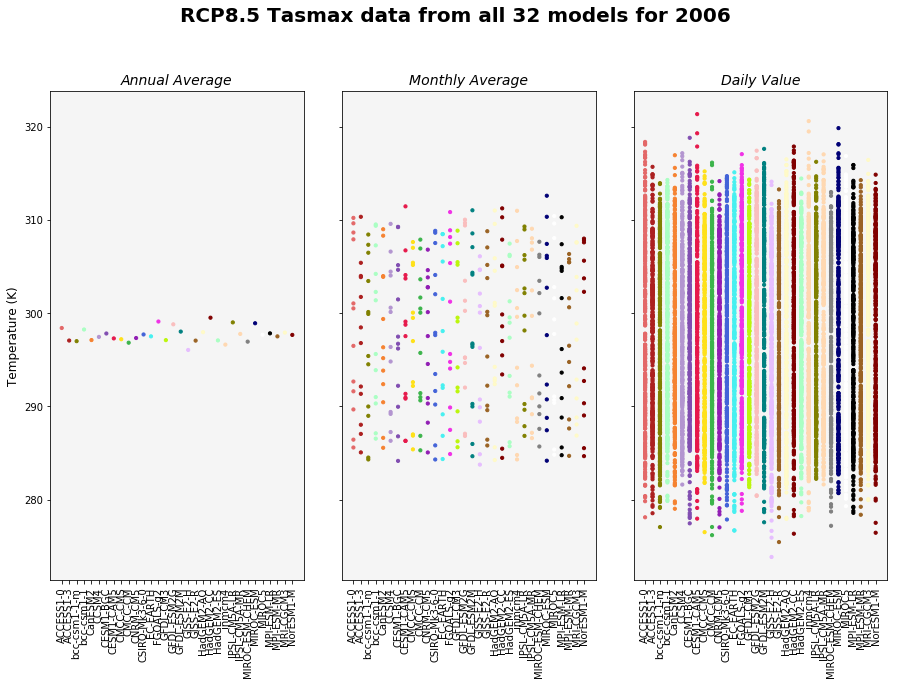

In [192]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all', figsize=(15, 9))

ax1.scatter(annual_df_2006['model'], annual_df_2006['avg'], s=10, c=annual_df_2006['model'].apply(lambda x: colors[x]))
ax2.scatter(monthly_df_2006['model'], monthly_df_2006[0], s=10, c=monthly_df_2006['model'].apply(lambda x: colors[x]))
ax3.scatter(daily_df_2006['model'], daily_df_2006[0],  s=10, c=daily_df_2006['model'].apply(lambda x: colors[x]))

ax1.set_title('Annual Average', fontstyle='italic', fontsize=14)
ax1.set_ylabel('Temperature (K)', fontsize=12)

ax2.set_title('Monthly Average', fontstyle='italic', fontsize=14)

ax3.set_title('Daily Value', fontstyle='italic', fontsize=14)

for ax in [ax1, ax2, ax3]:
    plt.sca(ax)
    plt.xticks(rotation=90)

# Space plots a bit
plt.subplots_adjust(wspace=0.15)

f.suptitle('RCP8.5 Tasmax data from all 32 models for 2006', y=1.01, fontsize=20, fontweight='bold')